<a href="https://colab.research.google.com/github/PreciousGemstone/CSSI-97-Project-insert_team_name-/blob/main/Project_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
def three_metrics(y_test, y_pred):

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)


  print("Mean Squared Error: " + str(mse))
  print("Mean Absolute Error: " + str(mae))
  print("r2 score: " + str(r2))

In [3]:


#@title get_data function
def get_data():
  data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/laptop_prices.csv'
  laptop = pd.read_csv(data)
  #AI helped write this code

  def categorize_cpu(cpu_model):
      if isinstance(cpu_model, str):
          cpu_model_lower = cpu_model.lower()
          if 'core i7' in cpu_model_lower:
              return 'Core i7'
          elif 'core i5' in cpu_model_lower:
              return 'Core i5'
          elif 'core i3' in cpu_model_lower:
              return 'Core i3'
          elif 'ryzen' in cpu_model_lower:
              return 'Ryzen'
          elif 'celeron' in cpu_model_lower:
              return 'Celeron'
          elif 'atom' in cpu_model_lower:
              return 'Atom'
          elif 'xeon' in cpu_model_lower:
              return 'Xeon'
          elif 'a' in cpu_model_lower and '-series' in cpu_model_lower:
              return 'A-Series'
          elif 'e' in cpu_model_lower and '-series' in cpu_model_lower:
              return 'E-Series'
          elif 'fx' in cpu_model_lower:
              return 'FX-Series'
          elif 'pentium' in cpu_model_lower:
              return 'Pentium'
          elif 'core m' in cpu_model_lower:
              return 'Core M'
          elif 'cortex' in cpu_model_lower:
              return 'Cortex'
          else:
              return 'Other'
      return 'Unknown'

  laptop['CPU_categories'] = laptop['CPU_model'].apply(categorize_cpu)

  def categorize_gpu(gpu_model):
      if isinstance(gpu_model, str):
          gpu_model_lower = gpu_model.lower()
          if 'geforce gtx' in gpu_model_lower:
              return 'Nvidia GeForce GTX'
          elif 'geforce mx' in gpu_model_lower:
              return 'Nvidia GeForce MX'
          elif 'geforce' in gpu_model_lower:
              return 'Nvidia GeForce'
          elif 'quadro' in gpu_model_lower:
              return 'Nvidia Quadro'
          elif 'nvidia' in gpu_model_lower:
              return 'Nvidia (Other)'
          elif 'radeon pro' in gpu_model_lower:
              return 'AMD Radeon Pro'
          elif 'radeon' in gpu_model_lower:
              return 'AMD Radeon'
          elif 'amd' in gpu_model_lower:
              return 'AMD (Other)'
          elif 'iris plus graphics' in gpu_model_lower:
              return 'Intel Iris Plus'
          elif 'hd graphics' in gpu_model_lower:
              return 'Intel HD Graphics'
          elif 'intel' in gpu_model_lower or 'graphics' in gpu_model_lower:
              return 'Intel (Other)'
          else:
              return 'Other'
      return 'Unknown'

  laptop['GPU_categories'] = laptop['GPU_model'].apply(categorize_gpu)

  #No more AI after this

  improved_laptop=laptop.drop(['CPU_model','GPU_model'],axis=1)
  improved_laptop=improved_laptop.drop(['Product','Company','TypeName','OS', 'CPU_company', 'GPU_company'],axis=1)

  improved_laptop = pd.get_dummies(improved_laptop, columns=['CPU_categories','GPU_categories', 'Touchscreen', 'PrimaryStorageType','SecondaryStorageType',
                                                           'Screen', 'RetinaDisplay','IPSpanel'], drop_first=True, dtype=int)

  improved_laptop_noscale = improved_laptop
  laptop_prices = improved_laptop[['Price_euros']]
  improved_laptop_features = improved_laptop.drop('Price_euros', axis=1)


  improved_laptop_onehot = improved_laptop_features.drop(['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
                                                'CPU_freq', 'PrimaryStorage', 'SecondaryStorage'],axis=1)
  improved_laptop_continous = improved_laptop_features[['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
                                                'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']]

  scaler = StandardScaler()
  price_scaler = StandardScaler()

  improved_laptop_continous_scaled = scaler.fit_transform(improved_laptop_continous)
  laptop_prices_scaled = price_scaler.fit_transform(laptop_prices)

  improved_laptop_continous = pd.DataFrame(improved_laptop_continous_scaled, columns= improved_laptop_continous.columns)
  laptop_prices = pd.DataFrame(laptop_prices_scaled, columns= laptop_prices.columns)

  improved_laptop = pd.concat([improved_laptop_continous, improved_laptop_onehot], axis=1)

  improved_laptop_wprice = pd.concat([laptop_prices, improved_laptop], axis=1)

  X, y = improved_laptop.values, laptop_prices.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)
  return(X_train, X_test, y_train, y_test, scaler, price_scaler, improved_laptop, improved_laptop_wprice, laptop_prices, improved_laptop_continous, improved_laptop_noscale)

X_train, X_test, y_train, y_test, scaler, price_scaler, improved_laptop, improved_laptop_wprice, laptop_prices, improved_laptop_continous, improved_laptop_noscale = get_data()

In [4]:
X_train

array([[ 4.03873147e-01,  1.48341793e+00, -1.43590581e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 4.03873147e-01, -8.64993649e-02, -7.85564186e-04, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 4.03873147e-01, -8.71458014e-01,  2.38401143e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.39546506e+00, -8.71458014e-01, -1.25651578e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.59359189e+00, -8.71458014e-01,  1.13535130e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.90558087e+00, -4.78978689e-01, -9.57532393e-01, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

# fitting NN

In [5]:

import matplotlib.pyplot as plt
neuralnetwork = MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant',
                             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=42, tol=0.0001, verbose=False,
                             warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                             beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
param_grid = {'hidden_layer_sizes': [(8,), (8, 4), (16, 8, 4), (32, 16, 8, 4), (64, 32, 16, 8, 4), (24, 12, 6), (32, 16, 8), (16, 16, 4), (16, 8, 8), (20, 10, 5), (16, 16, 8), (16, 4, 4)], 'learning_rate_init': [0.1, 0.01, 0.001, 0.0001, 0.00001]}
grid = GridSearchCV(neuralnetwork, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed w

GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=(50, 50, 50),
                                    random_state=42),
             param_grid={'hidden_layer_sizes': [(8,), (8, 4), (16, 8, 4),
                                                (32, 16, 8, 4),
                                                (64, 32, 16, 8, 4), (24, 12, 6),
                                                (32, 16, 8), (16, 16, 4),
                                                (16, 8, 8), (20, 10, 5),
                                                (16, 16, 8), (16, 4, 4)],
                         'learning_rate_init': [0.1, 0.01, 0.001, 0.0001,
                                                1e-05]},
             scoring='neg_mean_squared_error')

# scores

In [8]:
print("Best Parameters:", grid.best_params_)
print("Best Score (Negative MSE):", grid.best_score_)

print('\n')
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
three_metrics(price_scaler.inverse_transform(y_test.reshape(-1,1)), price_scaler.inverse_transform(y_pred.reshape(-1,1)))


Best Parameters: {'hidden_layer_sizes': (32, 16, 8), 'learning_rate_init': 0.001}
Best Score (Negative MSE): -0.18955335949299706


Mean Squared Error: 105038.62168418783
Mean Absolute Error: 218.88821008527776
r2 score: 0.8314780375754032


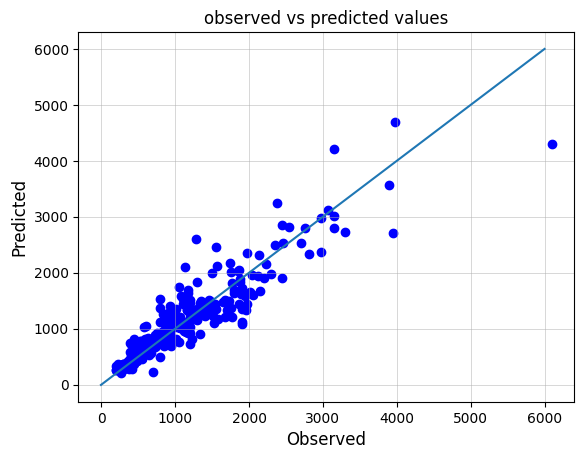

In [9]:
x = np.linspace(-5, 6000, 1000)
y=x
plt.scatter(price_scaler.inverse_transform(y_test.reshape(-1,1)), price_scaler.inverse_transform(y_pred.reshape(-1,1)) , color='blue', marker='o', label='Data')
plt.title("observed vs predicted values", fontsize=12)
plt.xlabel("Observed", fontsize=12)
plt.ylabel("Predicted", fontsize=12)

plt.grid(True, linewidth=0.7, alpha=0.5)
plt.plot(x,y)

In [ ]:
print(sklearn.__version__)